In [1]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
!tar -xvf  genres.tar.gz

--2021-06-20 17:18:27--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  12.9MB/s    in 91s     

2021-06-20 17:19:58 (12.9 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/ro

In [ ]:
!du -sh * 

1.3G	genres
1.2G	genres.tar.gz
55M	sample_data


In [1]:
import librosa
import IPython.display as ipd
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import glob
import numpy as np



In [3]:
class preprocess:
    def __init__(self,path):
        self.x, self.sr = librosa.load(path)
        self.spec=librosa.stft(self.x)
    def wave_plot(self):
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(self.x, sr=self.sr)
    
    def spectrogram_plot(self):
        X = librosa.stft(self.x)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(Xdb, sr=self.sr, x_axis='time', y_axis='log')
        plt.colorbar()
        
    def feature_ext(self):
        
        timbral_features=[]
        
        #Zero crossings 
        self.zero_crossings = librosa.zero_crossings(self.x, pad=False)
        self.zero_c_mean=self.zero_crossings.mean()
        self.zero_c_var=self.zero_crossings.var()
        timbral_features.append(self.zero_c_mean)
        timbral_features.append(self.zero_c_var)

        #Spectral  Centroids
        self.spectral_centroids = librosa.feature.spectral_centroid(self.x, sr=self.sr)[0]
        self.spec_cent_mean=self.spectral_centroids.mean()
        self.spec_cent_var=self.spectral_centroids.var()
        timbral_features.append(self.spec_cent_mean)
        timbral_features.append(self.spec_cent_var)

        #Spectral Rolloff
        self.spectral_rolloff = librosa.feature.spectral_rolloff(self.x, sr=self.sr)[0]
        self.spec_roll_mean=self.spectral_rolloff.mean()
        self.spec_roll_var=self.spectral_rolloff.var()
        timbral_features.append(self.spec_roll_mean)
        timbral_features.append(self.spec_roll_var)

        #Spectral Flux
        self.spectral_flux = librosa.onset.onset_strength(y=self.x, sr=self.sr)
        self.spec_flux_mean=self.spectral_flux.mean()
        self.spec_flux_var=self.spectral_flux.var()
        timbral_features.append(self.spec_flux_mean)
        timbral_features.append(self.spec_flux_var)

        #Low energy feature rmse 
        hop_length = 256
        frame_length = 512
        self.rmsi = librosa.feature.rms(self.x, frame_length=frame_length, hop_length=hop_length, center=True)
        r1=self.rmsi
        self.rmsf=((r1[r1<r1.mean()]).shape[0])/(r1.shape[1])*100
        timbral_features.append(self.rmsf)

        #mfcc 
        self.mfcc = librosa.feature.mfcc(self.x, sr=self.sr)
        top_mcc=5
        self.mfcc_ls_mean=[]
        self.mfcc_ls_var=[]
        for i in range(top_mcc):
            #self.mfcc_ls_mean.append(self.mfcc[i].mean())
            timbral_features.append(self.mfcc[i].mean())   
            #self.mfcc_ls_var.append(self.mfcc[i].var())
            timbral_features.append(self.mfcc[i].var())
            
        return timbral_features;
    
        
#         hop_length = 512

        

    
#     def FeatureSpectralFlux(self):
#         X=self.spec
#         f_s=self.sr
#         isSpectrum = X.ndim == 1
#         if isSpectrum:
#             X = np.expand_dims(X, axis=1)

#         # difference spectrum (set first diff to zero)
#         X = np.c_[X[:, 0], X]

#         afDeltaX = np.diff(X, 1, axis=1)

#         # flux
#         vsf = np.sqrt((afDeltaX**2).sum(axis=0)) / X.shape[0]

#         return np.squeeze(vsf) if isSpectrum else vsf


In [2]:
genre_list=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
genre_label=np.arange(10)
Data=[]

In [ ]:
def read_file(enter_genre):
    list_of_files = glob.glob('genres/'+enter_genre+'/./*.wav')
    Tfls=[]
    for path in list_of_files:
        aud=preprocess(path)
        fls=aud.feature_ext()
        fls.append(enter_genre)
        #print(fls)
        Tfls.append(fls)
        Data.append(fls)
        #print(path)
    return Tfls;
#         print(sum(audb.zero_crossings))
#     x1,sr1 = librosa.load(path)
#     print(x1.shape)

In [ ]:
# blue_dir
#headers=[zero_c_mean,zero_c_var,spec_cent_mean,spec_cent_var,spec_roll_mean,spec_roll_var,spec_flux_mean,spec_flux_var,low_enery,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var]
read_file('blues')
read_file('classical')


In [ ]:
read_file('country')
read_file('disco')
read_file('hiphop')
read_file('jazz')
read_file('metal')
read_file('pop')
read_file('reggae')
read_file('rock')

In [ ]:
len(Data)

1000

In [5]:
Data_array=np.array(Data)

In [ ]:
Data_array.shape

(1000, 20)

In [7]:
import pandas as pd
headers=['zero_c_mean','zero_c_var','spec_cent_mean','spec_cent_var','spec_roll_mean','spec_roll_var','spec_flux_mean','spec_flux_var','low_enery','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','genre']
#df=pd.DataFrame(data = Data_array,columns = headers)

In [8]:
#df.to_csv('file1.csv', index=False)
df= pd.read_csv('file1.csv')
df.head()

,zero_c_mean,zero_c_var,spec_cent_mean,spec_cent_var,spec_roll_mean,spec_roll_var,spec_flux_mean,spec_flux_var,low_enery,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,genre
0,0.124850,0.109262,2442.871410,130742.025072,5267.699289,4.145374e+05,1.291576,1.324141,47.757154,-3.554832,1022.7667,92.92088,171.85226,-25.078386,149.23361,45.174667,65.831390,-10.851961,70.53196,blues
1,0.076403,0.070566,1552.811865,156467.643261,3042.260232,7.840345e+05,1.637518,3.802895,52.320186,-90.722595,3319.0450,140.44630,508.76505,-29.093890,411.78122,31.684334,144.090350,-13.984502,155.49376,blues
2,0.098497,0.088796,2159.392000,328873.563016,4684.529188,1.074291e+06,1.673205,3.045333,48.453210,-133.015980,1942.5370,105.73445,800.10254,-22.149996,316.45150,41.831104,143.757490,-26.984575,155.03719,blues
3,0.127472,0.111223,2116.917659,95000.318855,4195.660528,4.374670e+05,1.309309,1.342848,46.017015,-26.977493,4598.2554,107.32024,437.02510,-46.830658,200.63315,40.923653,239.368350,-21.464111,73.13674,blues
4,0.128617,0.112075,2310.498241,191255.537256,4829.324574,6.183907e+05,1.327376,2.340826,55.491106,-90.643260,2589.2680,100.09118,298.82184,-23.929040,451.22137,52.593014,120.748184,-20.921095,110.05964,blues


In [9]:
df.head()
df.shape

(1000, 20)

In [10]:
from sklearn.preprocessing import LabelEncoder
class_list = df.iloc[:, -1]
Label_encoder = LabelEncoder()

In [11]:
y = Label_encoder.fit_transform(class_list)

In [12]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [13]:
#Spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, shuffle=True, test_size=.30)
len(y_train)

700

#CNN Model

In [14]:
from keras import regularizers
from keras import losses
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.optimizers import RMSprop,SGD,Adam
# Plot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#DeepNeuralNetwork
class DNN_Model:

  def trainModel(self, model, epochs, optimizer,batch_size):
    
    model.compile(optimizer = optimizer,
                  loss = 'sparse_categorical_crossentropy',
                  metrics='accuracy')
    return model.fit(X_train,y_train,
                    validation_data = (X_test,y_test),
                    epochs= epochs,
                    batch_size=batch_size)
    
  # Create the model
  def generate_model(self, dropout_rate=0.2,l2_rate=0.0):
    model = Sequential()
    #Layer_1
    model.add(Dense(units=256, activation='relu',input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))

    #Layer_2
    model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))




    model.add(Dense(units=10, activation='softmax',kernel_regularizer=regularizers.l2(l2_rate) ))
    model.summary()
    return model;

  


In [16]:

batch_size = 128

dnn_model = DNN_Model()
model = dnn_model.generate_model(dropout_rate=0.35, l2_rate=0.0)
history = dnn_model.trainModel(model = model, epochs=200 , optimizer='adam',batch_size=batch_size)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               5120      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 39,306
Trainable params: 39,306
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 15s 94ms/step - loss: 2.2378 - accuracy: 0.1714 - val_loss: 1.9804 

Test loss: 1.1033971309661865 / Test accuracy: 0.7166666388511658


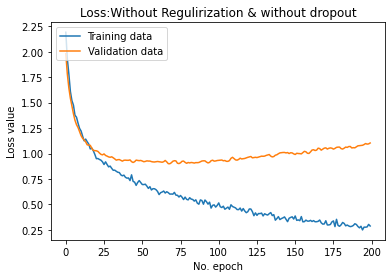

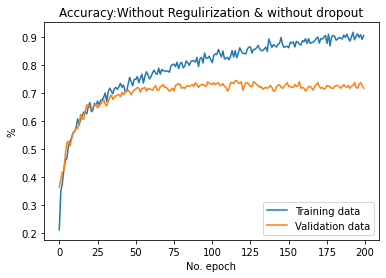

In [17]:
#Evaluation metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('Loss:Without Regulirization & without dropout')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('Accuracy:Without Regulirization & without dropout')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=genre_list))

(300,) (300,)
              precision    recall  f1-score   support

       blues       0.80      0.69      0.74        29
   classical       0.85      0.94      0.89        31
     country       0.61      0.71      0.66        28
       disco       0.63      0.63      0.63        30
      hiphop       0.62      0.57      0.59        28
        jazz       0.76      0.86      0.81        29
       metal       0.83      1.00      0.91        29
         pop       0.69      0.69      0.69        35
      reggae       0.61      0.59      0.60        29
        rock       0.76      0.50      0.60        32

    accuracy                           0.72       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.72      0.72      0.71       300



In [19]:
from keras.utils import np_utils
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.7167


[1.1033971309661865, 0.7166666388511658]

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[20  0  4  0  0  2  2  0  0  1]
 [ 0 29  1  0  0  1  0  0  0  0]
 [ 1  0 20  1  0  4  1  0  0  1]
 [ 0  0  1 19  4  0  0  2  2  2]
 [ 0  0  0  3 16  0  2  4  3  0]
 [ 0  4  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  1  3  1  1  0 24  4  1]
 [ 0  1  2  2  5  0  0  2 17  0]
 [ 4  0  4  2  0  0  1  3  2 16]]


Accuracy %: 71.66666666666667


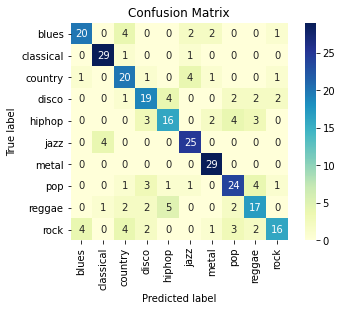

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy %:",accuracy_score(y_true, y_pred)*100)

### 10 clusters
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.axes()
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat,cmap="YlGnBu", square=True, annot=True, fmt='d',ax=ax, cbar=True,
            xticklabels=genre_list,
            yticklabels=genre_list)
ax.set_title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');